# **CASE: LIMITE DE CARTÃO DE CRÉDITO**

---

### Instalação de bibliotecas

In [1]:
# # Para geração de correlograma
# install.packages("GGally")
# # Para cálculo do VIF
# install.packages("car")

### Carregamento de bibliotecas

In [1]:
library(GGally)
library(car)

ERROR: Error in library(GGally): there is no package called ‘GGally’


### Leitura da base de dados

In [2]:
dados_limite <- read.table(file   = "../Dados/Limite_Cartao.txt",
                           sep    = "\t",
                           dec    = ",",
                           header = TRUE)

### Visualização da base de dados

In [3]:
View(dados_limite)

ID_CLIENTE,SCORE_CREDITO,VALOR_TOTAL_ATRASOS_12M,QTD_CONSULTAS_CREDITO_12M,RENDIMENTO_MEDIO_12M,TEMPO_TRABALHO,IDADE,QTD_DEPENDENTES,LIMITE_INICIAL_CARTAO
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,79,0.00,2,9350,15,37,0,9700
2,73,3195.52,1,2010,17,22,0,1400
3,80,0.00,3,15660,16,57,2,9800
4,77,0.00,1,18640,11,33,0,8300
5,89,0.00,1,7550,15,21,1,11700
6,68,4635.26,3,2300,9,27,0,1000
7,86,0.00,1,4950,9,24,1,8400
8,80,0.00,1,9230,18,38,1,4700
9,70,1750.38,1,7050,20,43,1,3000


### Análise exploratória breve

In [4]:
# Medidas resumo
summary(dados_limite)

   ID_CLIENTE     SCORE_CREDITO    VALOR_TOTAL_ATRASOS_12M
 Min.   :   1.0   Min.   : 44.00   Min.   :    0.0        
 1st Qu.: 625.8   1st Qu.: 75.00   1st Qu.:    0.0        
 Median :1250.5   Median : 80.00   Median :    0.0        
 Mean   :1250.5   Mean   : 79.57   Mean   :  823.9        
 3rd Qu.:1875.2   3rd Qu.: 85.00   3rd Qu.: 1215.5        
 Max.   :2500.0   Max.   :100.00   Max.   :16109.3        
 QTD_CONSULTAS_CREDITO_12M RENDIMENTO_MEDIO_12M TEMPO_TRABALHO      IDADE      
 Min.   :1.000             Min.   :    0        Min.   : 1.00   Min.   :18.00  
 1st Qu.:2.000             1st Qu.: 6800        1st Qu.:12.00   1st Qu.:27.00  
 Median :2.000             Median : 9920        Median :15.00   Median :33.00  
 Mean   :2.068             Mean   :10701        Mean   :14.95   Mean   :34.74  
 3rd Qu.:2.000             3rd Qu.:14062        3rd Qu.:18.00   3rd Qu.:41.00  
 Max.   :6.000             Max.   :38580        Max.   :33.00   Max.   :66.00  
 QTD_DEPENDENTES LIMITE_INI

### Análise bivariada: variável resposta vs. variáveis explicativas

In [29]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
reset_options <- options()
options(repr.plot.width = 15, repr.plot.height = 15)

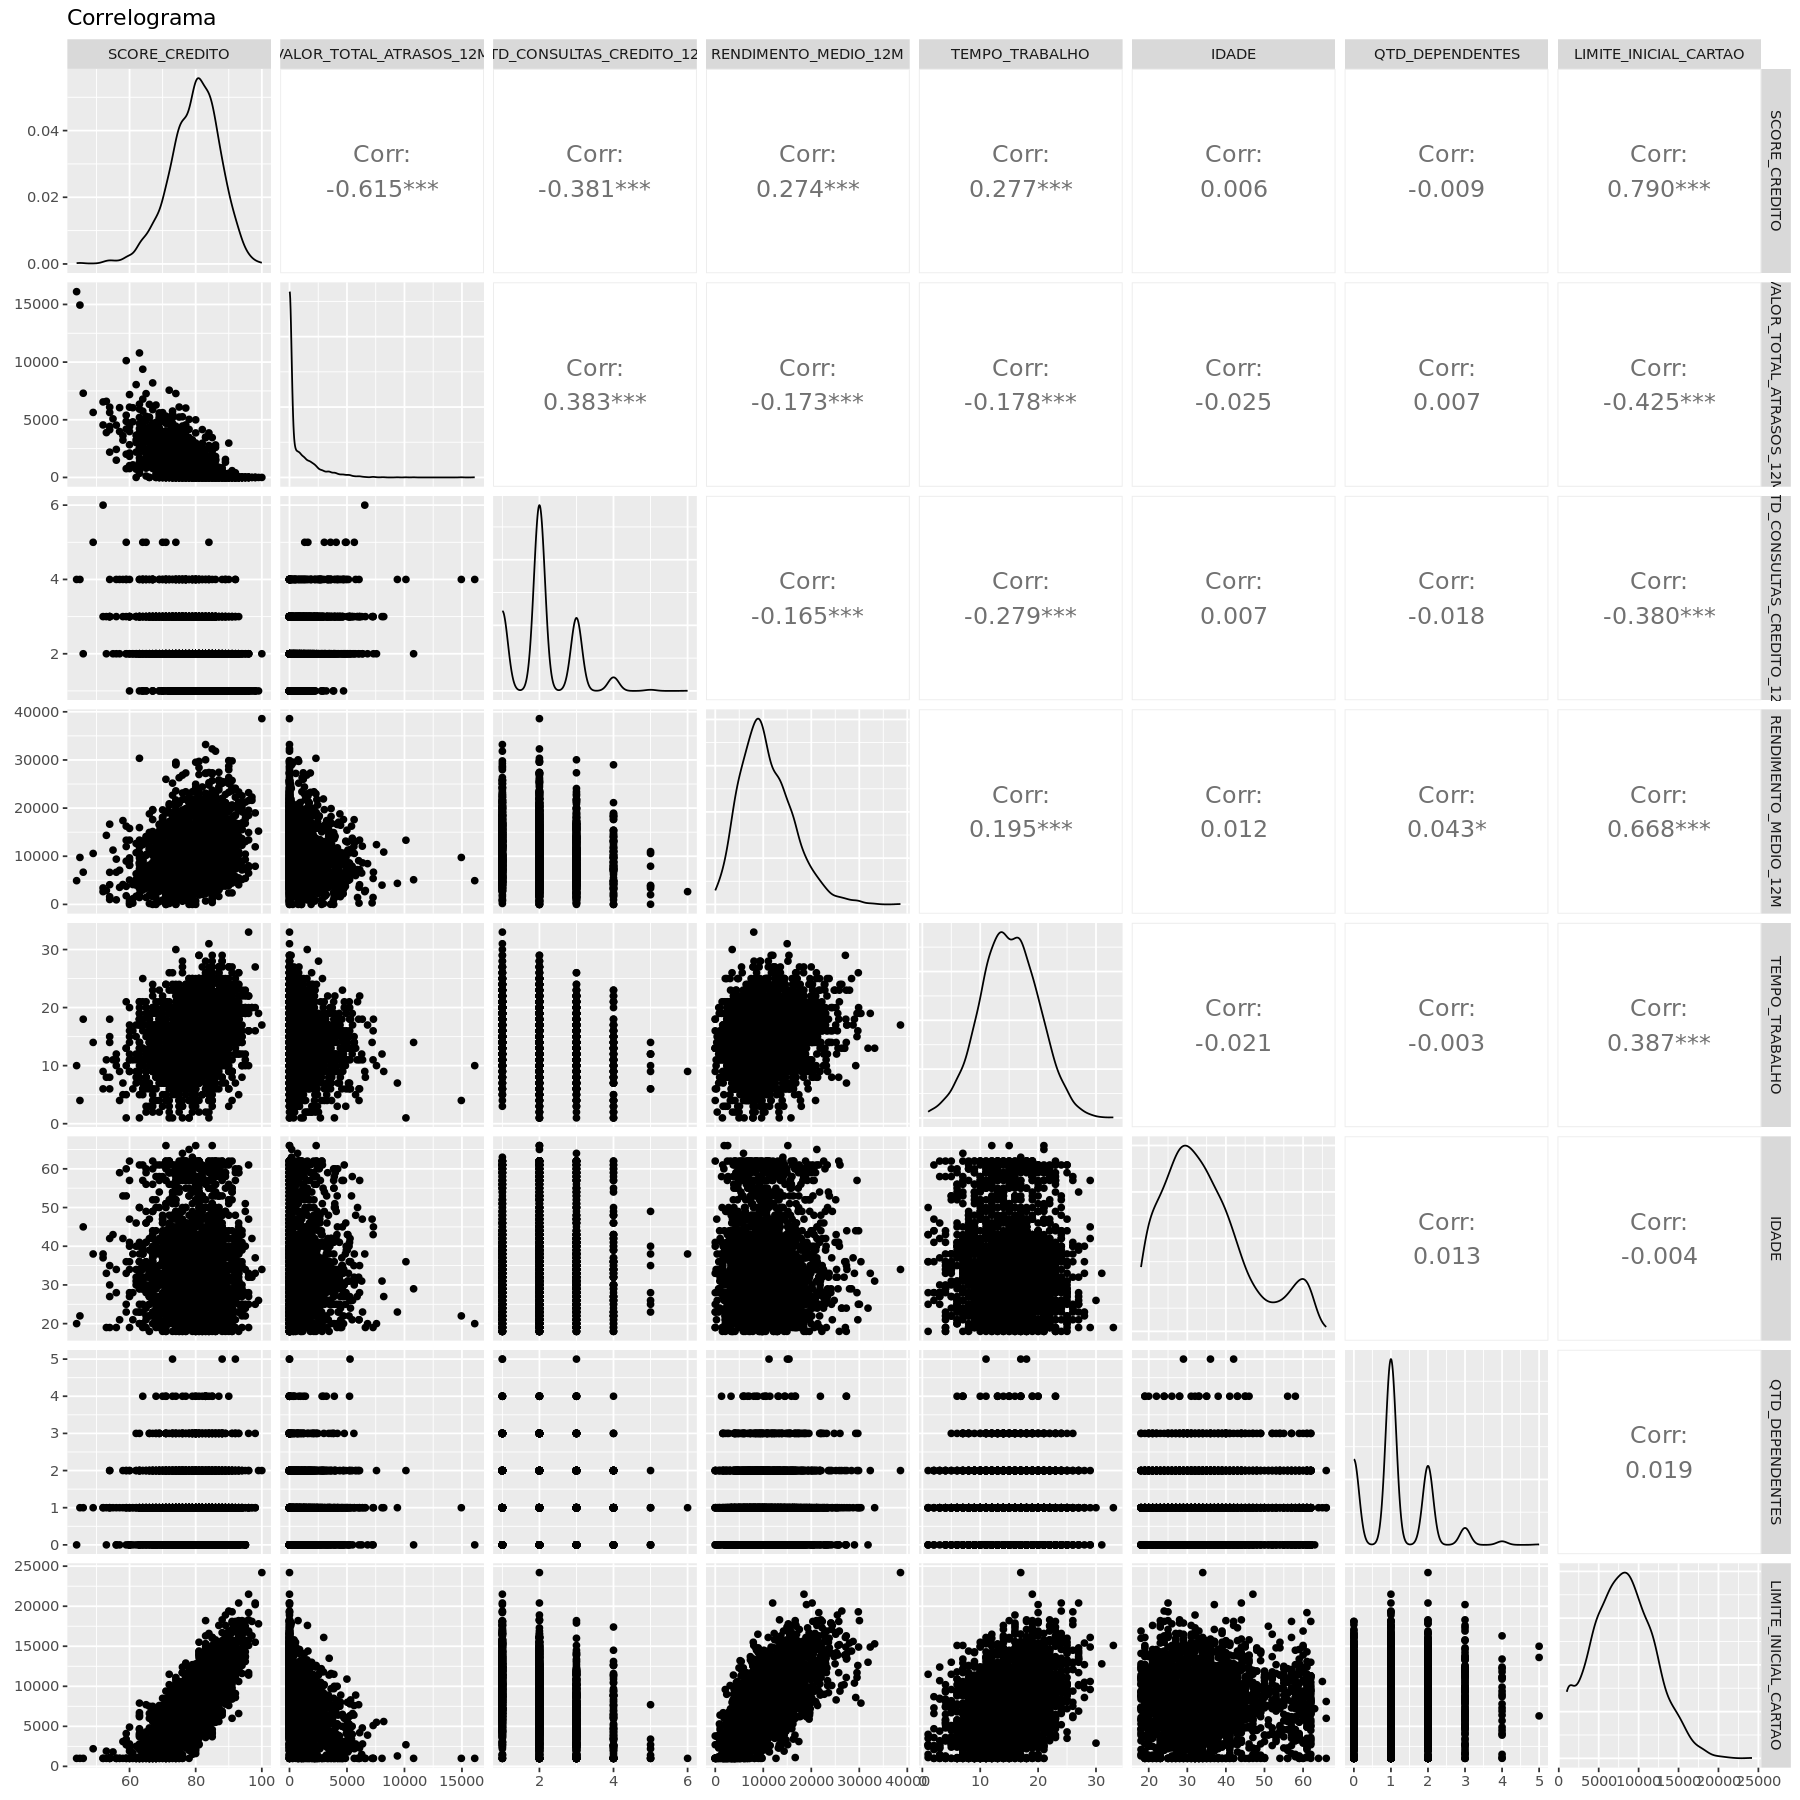

In [30]:
# Correlograma
ggpairs(dados_limite[, !names(dados_limite) %in% "ID_CLIENTE"],
        title = "Correlograma",
        upper = list(continuous = wrap("cor", size = 5)))

In [8]:
# Resetando parâmetros gráficos (recomendado apenas no Colab)
options(reset_options)

### Modelo de regressão linear múltipla

In [9]:
# Comando auxiliar para para omitir notação científica nos p-valores e controlar largura dos outputs na tela do Colab
options(scipen = 999, width = 200)

In [10]:
# Ajuste do modelo 1: inicial
regressao_1 <- lm(LIMITE_INICIAL_CARTAO ~
                  SCORE_CREDITO +
                  VALOR_TOTAL_ATRASOS_12M +
                  QTD_CONSULTAS_CREDITO_12M +
                  RENDIMENTO_MEDIO_12M +
                  TEMPO_TRABALHO +
                  IDADE +
                  QTD_DEPENDENTES,
                data = dados_limite)

summary(regressao_1)


Call:
lm(formula = LIMITE_INICIAL_CARTAO ~ SCORE_CREDITO + VALOR_TOTAL_ATRASOS_12M + 
    QTD_CONSULTAS_CREDITO_12M + RENDIMENTO_MEDIO_12M + TEMPO_TRABALHO + 
    IDADE + QTD_DEPENDENTES, data = dados_limite)

Residuals:
    Min      1Q  Median      3Q     Max 
-4858.6  -979.8     1.3   954.0  5107.3 

Coefficients:
                               Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)               -24152.331107    435.192831 -55.498 < 0.0000000000000002 ***
SCORE_CREDITO                348.113952      5.001174  69.606 < 0.0000000000000002 ***
VALOR_TOTAL_ATRASOS_12M        0.319319      0.025934  12.313 < 0.0000000000000002 ***
QTD_CONSULTAS_CREDITO_12M   -275.521607     40.573670  -6.791      0.0000000000139 ***
RENDIMENTO_MEDIO_12M           0.335129      0.005469  61.281 < 0.0000000000000002 ***
TEMPO_TRABALHO                86.645754      6.050637  14.320 < 0.0000000000000002 ***
IDADE                         -2.829935      2.526934  -1.120           

In [11]:
# Ajuste do modelo 2: retirando QTD_DEPENDENTES
regressao_2 <- lm(LIMITE_INICIAL_CARTAO ~
                  SCORE_CREDITO +
                  VALOR_TOTAL_ATRASOS_12M +
                  QTD_CONSULTAS_CREDITO_12M +
                  RENDIMENTO_MEDIO_12M +
                  TEMPO_TRABALHO +
                  IDADE,
                data = dados_limite)

summary(regressao_2)


Call:
lm(formula = LIMITE_INICIAL_CARTAO ~ SCORE_CREDITO + VALOR_TOTAL_ATRASOS_12M + 
    QTD_CONSULTAS_CREDITO_12M + RENDIMENTO_MEDIO_12M + TEMPO_TRABALHO + 
    IDADE, data = dados_limite)

Residuals:
    Min      1Q  Median      3Q     Max 
-4860.5  -976.5     6.9   951.1  5092.5 

Coefficients:
                               Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)               -24134.363979    433.038490 -55.733 < 0.0000000000000002 ***
SCORE_CREDITO                348.077713      4.999615  69.621 < 0.0000000000000002 ***
VALOR_TOTAL_ATRASOS_12M        0.319396      0.025929  12.318 < 0.0000000000000002 ***
QTD_CONSULTAS_CREDITO_12M   -275.902025     40.556992  -6.803      0.0000000000128 ***
RENDIMENTO_MEDIO_12M           0.335236      0.005462  61.377 < 0.0000000000000002 ***
TEMPO_TRABALHO                86.618749      6.049302  14.319 < 0.0000000000000002 ***
IDADE                         -2.815910      2.526299  -1.115                0.265    
---

In [12]:
# Ajuste do modelo 3: retirando IDADE
regressao_3 <- lm(LIMITE_INICIAL_CARTAO ~
                  SCORE_CREDITO +
                  VALOR_TOTAL_ATRASOS_12M +
                  QTD_CONSULTAS_CREDITO_12M +
                  RENDIMENTO_MEDIO_12M +
                  TEMPO_TRABALHO,
                data = dados_limite)

summary(regressao_3)


Call:
lm(formula = LIMITE_INICIAL_CARTAO ~ SCORE_CREDITO + VALOR_TOTAL_ATRASOS_12M + 
    QTD_CONSULTAS_CREDITO_12M + RENDIMENTO_MEDIO_12M + TEMPO_TRABALHO, 
    data = dados_limite)

Residuals:
    Min      1Q  Median      3Q     Max 
-4841.2  -975.5    10.5   950.3  5095.7 

Coefficients:
                               Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)               -24236.386302    423.275434 -57.259 < 0.0000000000000002 ***
SCORE_CREDITO                348.118442      4.999724  69.628 < 0.0000000000000002 ***
VALOR_TOTAL_ATRASOS_12M        0.320249      0.025919  12.356 < 0.0000000000000002 ***
QTD_CONSULTAS_CREDITO_12M   -276.431359     40.556183  -6.816      0.0000000000117 ***
RENDIMENTO_MEDIO_12M           0.335149      0.005462  61.364 < 0.0000000000000002 ***
TEMPO_TRABALHO                86.771740      6.048039  14.347 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1412 

In [13]:
# Avaliação de colinearidade no modelo 3
data.frame(VIF = vif(regressao_3))

,VIF
,<dbl>
SCORE_CREDITO,1.786745
VALOR_TOTAL_ATRASOS_12M,1.680847
QTD_CONSULTAS_CREDITO_12M,1.272404
RENDIMENTO_MEDIO_12M,1.101425
TEMPO_TRABALHO,1.142733


In [14]:
# Ajuste do modelo 4: retirando VALOR_TOTAL_ATRASOS_12M (colinearidade)
regressao_4 <- lm(LIMITE_INICIAL_CARTAO ~
                  SCORE_CREDITO +
                  QTD_CONSULTAS_CREDITO_12M +
                  RENDIMENTO_MEDIO_12M +
                  TEMPO_TRABALHO,
                data = dados_limite)

summary(regressao_4)


Call:
lm(formula = LIMITE_INICIAL_CARTAO ~ SCORE_CREDITO + QTD_CONSULTAS_CREDITO_12M + 
    RENDIMENTO_MEDIO_12M + TEMPO_TRABALHO, data = dados_limite)

Residuals:
    Min      1Q  Median      3Q     Max 
-4779.9  -994.1   -17.8   987.4  6871.9 

Coefficients:
                               Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)               -21575.465956    375.307208 -57.487 < 0.0000000000000002 ***
SCORE_CREDITO                314.863503      4.339666  72.555 < 0.0000000000000002 ***
QTD_CONSULTAS_CREDITO_12M   -173.482292     40.879674  -4.244            0.0000228 ***
RENDIMENTO_MEDIO_12M           0.335432      0.005625  59.631 < 0.0000000000000002 ***
TEMPO_TRABALHO                88.984299      6.226423  14.291 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1454 on 2495 degrees of freedom
Multiple R-squared:  0.8585,	Adjusted R-squared:  0.8583 
F-statistic:  3786 on 4 and 2495 

In [15]:
# Avaliação de colinearidade no modelo 4
data.frame(VIF = vif(regressao_4))

,VIF
,<dbl>
SCORE_CREDITO,1.268978
QTD_CONSULTAS_CREDITO_12M,1.218700
RENDIMENTO_MEDIO_12M,1.101406
TEMPO_TRABALHO,1.141732


### Intervalos de confiança

In [16]:
# Escolha do beta (0 para intercepto, ou 1, 2, ... para os ângulos referentes a cada variável explicativa)
beta = 0

In [17]:
# Cálculo do intervalo
print("Limite inferior")
as.numeric(regressao_4$coefficients[beta + 1] - 1.96 * coef(summary(regressao_4))[beta + 1, "Std. Error"])
print("Limite superior")
as.numeric(regressao_4$coefficients[beta + 1] + 1.96 * coef(summary(regressao_4))[beta + 1, "Std. Error"])

[1] "Limite inferior"


[1] -22311.07

[1] "Limite superior"


[1] -20839.86

### Qualidade de ajuste

In [18]:
# Coeficiente de determinação ajustado (R² ajustado)
summary(regressao_4)$adj.r.squared

[1] 0.8583118

In [19]:
# MAE
sum(abs(regressao_4$residuals))/nrow(dados_limite)

[1] 1155.162

In [20]:
# MAPE
sum(abs(regressao_4$residuals/dados_limite$LIMITE_INICIAL_CARTAO))/nrow(dados_limite)

[1] 0.244268

### Análise de resíduos

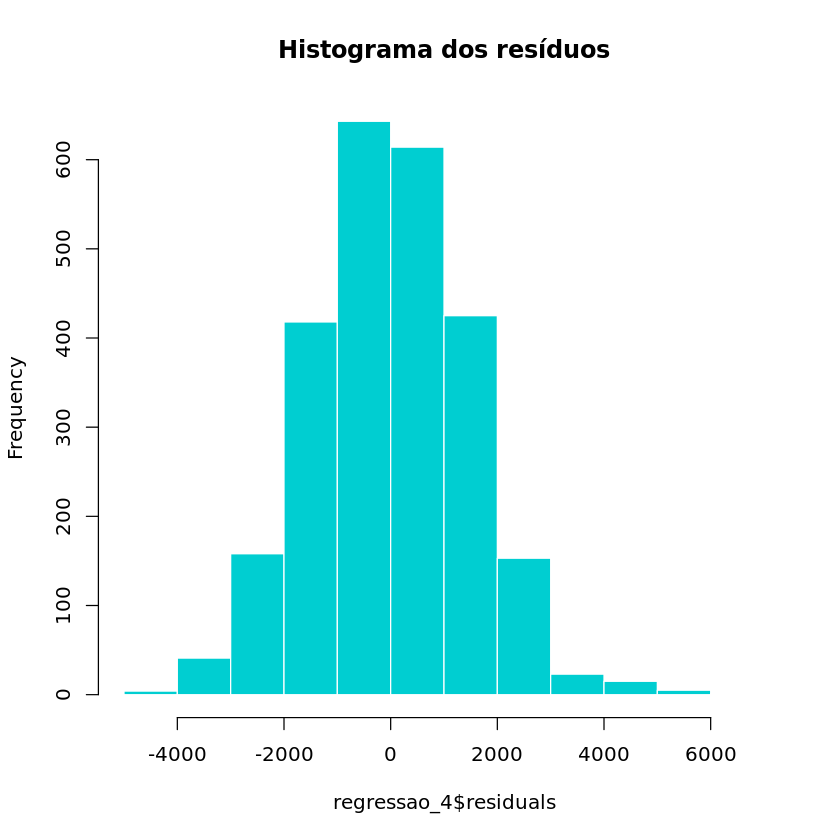

In [21]:
# Histograma dos resíduos
hist(x      = regressao_4$residuals,
     main   = "Histograma dos resíduos",
     col    = "darkturquoise",
     border = "white")

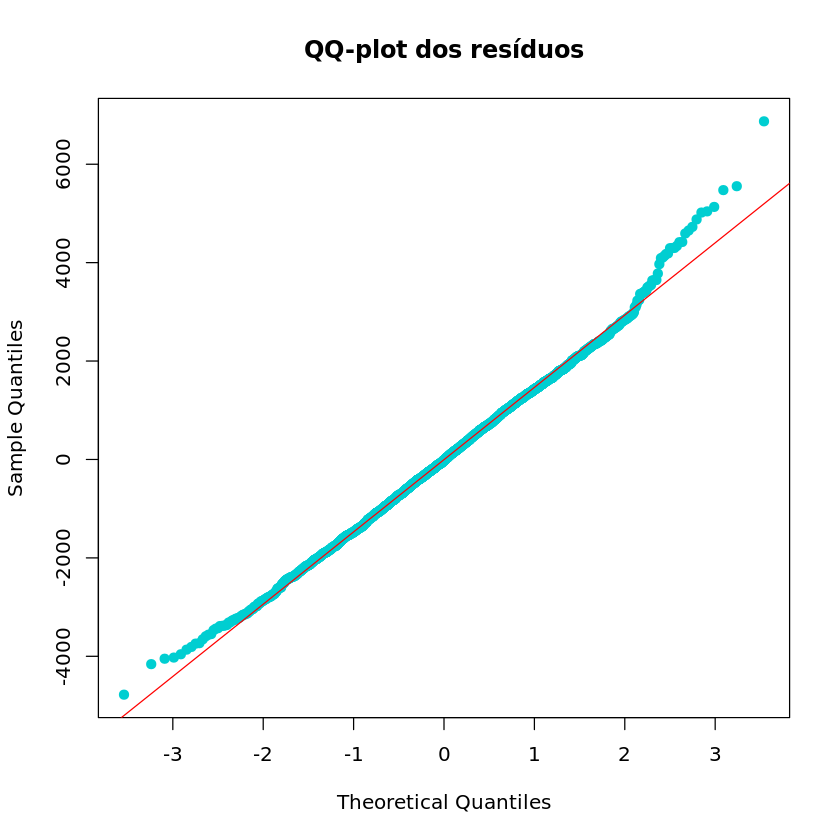

In [22]:
# QQ plot dos resíduos
qqnorm(y    = regressao_4$residuals,
       main = "QQ-plot dos resíduos",
       col  = "darkturquoise",
       pch  = 19)
qqline(y    = regressao_4$residuals,
       col  = "red")

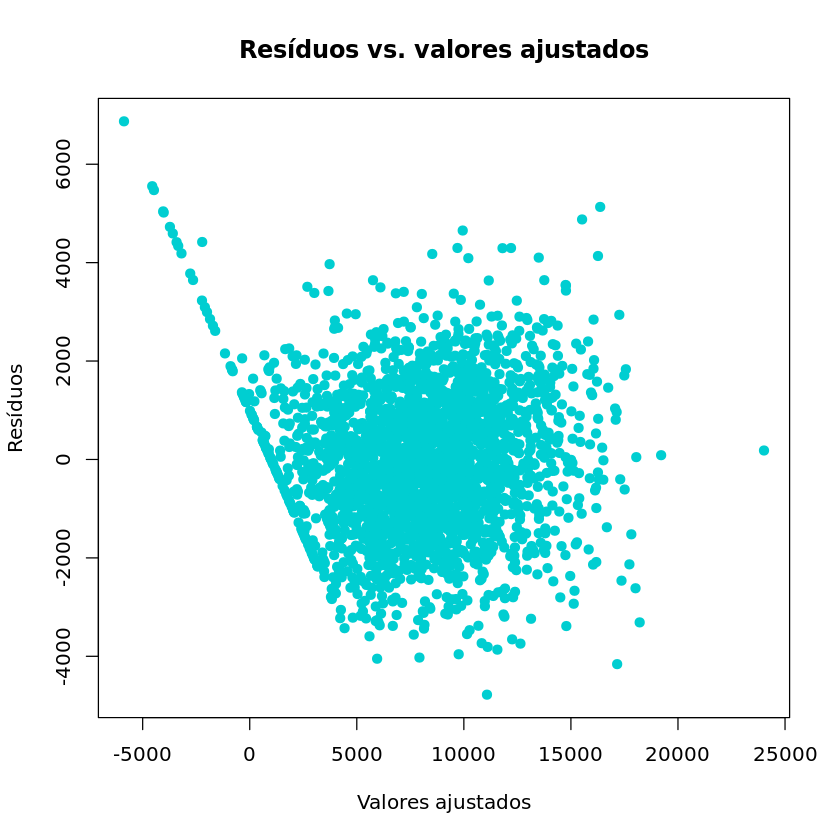

In [23]:
# Resíduos vs. valores preditos
plot(x    = regressao_4$fitted.values,
     y    = regressao_4$residuals,
     pch  = 19,
     col  = "darkturquoise",
     xlab = "Valores ajustados",
     ylab = "Resíduos",
     main = "Resíduos vs. valores ajustados")

### Exemplo de uso (aplicação) do modelo

In [24]:
# Criação de base de dados com um novo cliente, com 80 pontos de score de crédito, 1 consulta de crédito nos últimos 12m, rendimento médio de 5.000 reais e 5 anos de tempo de trabalho
# Obs.: os nomes das colunas devem ser idênticos aos da base utilizada para construção do modelo
novos_dados <- data.frame(SCORE_CREDITO             = c(80),
                          QTD_CONSULTAS_CREDITO_12M = c(1),
                          RENDIMENTO_MEDIO_12M      = c(5000),
                          TEMPO_TRABALHO            = c(5))

In [25]:
# Aplicação do modelo
novos_dados$LIMITE_INICIAL_CARTAO_PREDITO <- predict(regressao_4, novos_dados)
View(novos_dados)

SCORE_CREDITO,QTD_CONSULTAS_CREDITO_12M,RENDIMENTO_MEDIO_12M,TEMPO_TRABALHO,LIMITE_INICIAL_CARTAO_PREDITO
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
80,1,5000,5,5562.214
